# **다항 회귀 이해**

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [3]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [4]:
#선형회귀 모델에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_ftr, y)

print('다항 회귀 계수:\n', np.round(model.coef_, 2))
print('다항 회귀 계수 Shape:', model.coef_.shape)

다항 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
다항 회귀 계수 Shape: (10,)


In [6]:
#다항회귀 Pipeline(다항 피처 변환 --> 선형회귀)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model.fit(X, y)

print('다항 회귀 계수:\n', np.round(model.named_steps['linear'].coef_, 2))

다항 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# **과소적합 및 과적합 이해**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#데이터 생성
def true_func(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_func(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


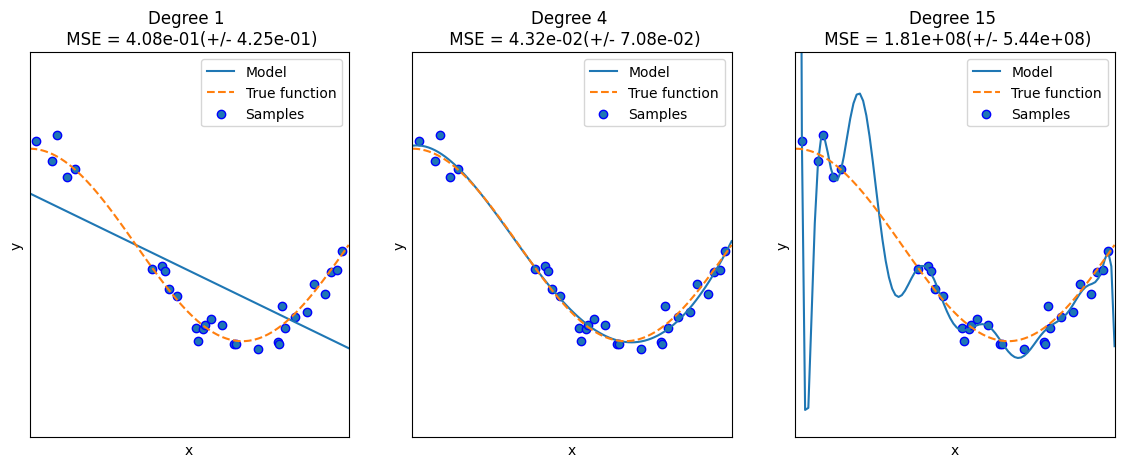

In [10]:
#다항식 차수별(1, 4, 15) 예측 성능(MSE)을 교차검증(10 폴드)으로 평가
#테스트 데이터로 차수별 회귀 예측 곡선 시각화
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    #다항식 계수 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    #교차검증으로 다항회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    #회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print(f'\nDegree {degrees[i]} 회귀 계수는 {np.round(coefficients, 2)} 입니다.')
    print(f'Degree {degrees[i]} MSE는 {-1 * np.mean(scores)} 입니다.')

    #테스트 데이터로 회귀 예측 수행 후 시각화
    X_test = np.linspace(0, 1, 100)
    #예측 곡선
    y_pred = pipeline.predict(X_test.reshape(-1,1))
    plt.plot(X_test, y_pred, label='Model')
    #실제 곡선
    plt.plot(X_test, true_func(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title(f'Degree {degrees[i]} \n MSE = {-scores.mean():.2e}(+/- {scores.std():.2e})')
plt.show()